In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
import importlib

In [2]:
df = load_data()

# Evaluate the best number of Cluster on product

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11348
Clusters = 8 ,Silhouette Score = 0.08078
Clusters = 9 ,Silhouette Score = 0.07797
Clusters = 10 ,Silhouette Score = 0.08938
Clusters = 11 ,Silhouette Score = 0.06361
Clusters = 12 ,Silhouette Score = 0.04589
Clusters = 13 ,Silhouette Score = 0.03957
Clusters = 14 ,Silhouette Score = 0.0869


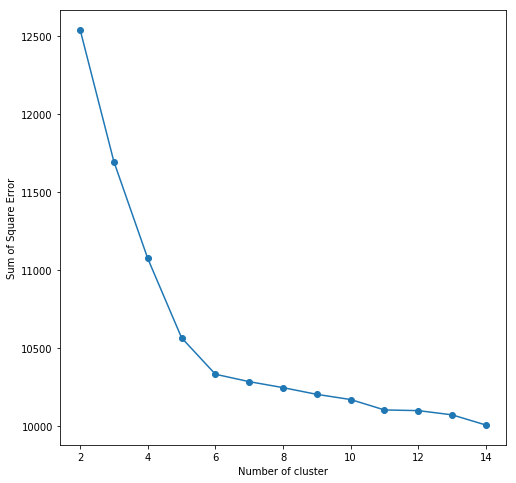

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6)

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

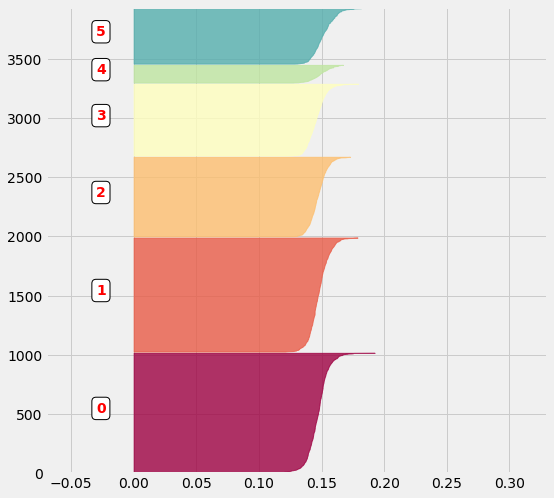

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

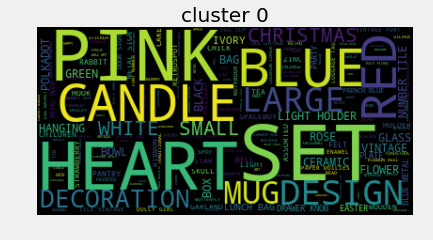

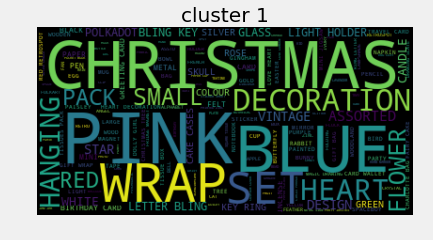

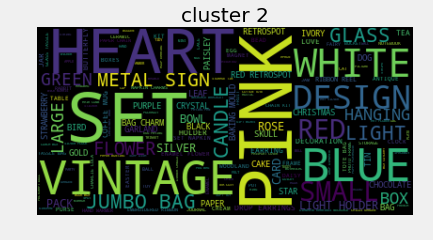

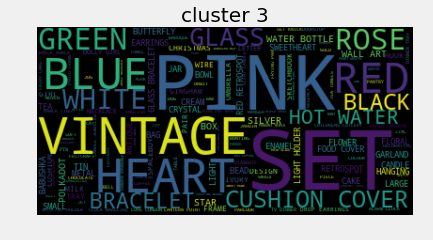

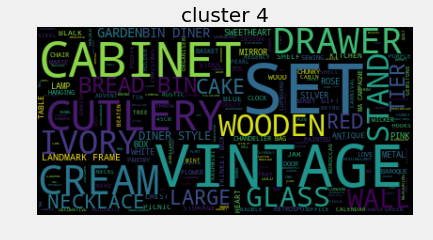

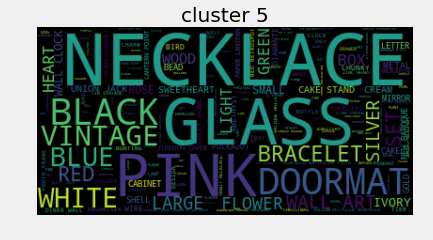

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

In [11]:
tf_idf_rfm = rfm(df,model_type='TF-IDF')
tf_idf_rfm = rfm_transform(tf_idf_rfm)
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
2058,12792,1,5,2.0,3.0,2.0,2.0,2.0,3.0,1.0
1626,12361,1,5,1.0,3.0,1.0,2.0,1.0,2.0,1.0
4005,17274,2,3,1.0,1.0,2.0,1.0,1.0,2.0,1.0
2879,15280,1,4,1.0,1.0,3.0,1.0,1.0,2.0,1.0
2498,14353,2,5,1.0,2.0,1.0,1.0,1.0,2.0,1.0
3320,16761,2,4,2.0,3.0,3.0,1.0,1.0,2.0,1.0
3255,15313,1,4,1.0,1.0,1.0,2.0,1.0,2.0,1.0
1162,14782,1,5,1.0,3.0,1.0,2.0,1.0,2.0,1.0
555,17456,2,5,2.0,2.0,4.0,2.0,1.0,2.0,1.0
2118,14957,1,5,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [12]:
matrix = rfm_matrix(tf_idf_rfm,model_type=1)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.34976
Clusters = 3 ,Silhouette Score = 0.23696
Clusters = 4 ,Silhouette Score = 0.23206
Clusters = 5 ,Silhouette Score = 0.20141
Clusters = 6 ,Silhouette Score = 0.19398
Clusters = 7 ,Silhouette Score = 0.17704
Clusters = 8 ,Silhouette Score = 0.1791
Clusters = 9 ,Silhouette Score = 0.1754
Clusters = 10 ,Silhouette Score = 0.1669
Clusters = 11 ,Silhouette Score = 0.16312
Clusters = 12 ,Silhouette Score = 0.16014
Clusters = 13 ,Silhouette Score = 0.1527
Clusters = 14 ,Silhouette Score = 0.15155


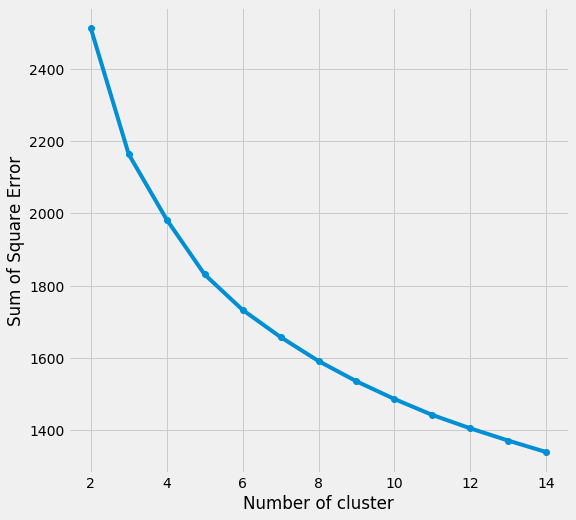

In [13]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [14]:
clusters = kmeans(matrix = matrix, cluster_num = 4)
tf_idf_rfm = rfm_write_back(tf_idf_rfm,clusters) 
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
2058,12792,1,5,2.0,3.0,2.0,2.0,2.0,3.0,1.0,3
1626,12361,1,5,1.0,3.0,1.0,2.0,1.0,2.0,1.0,3
4005,17274,2,3,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3
2879,15280,1,4,1.0,1.0,3.0,1.0,1.0,2.0,1.0,3
2498,14353,2,5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3
3320,16761,2,4,2.0,3.0,3.0,1.0,1.0,2.0,1.0,3
3255,15313,1,4,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3
1162,14782,1,5,1.0,3.0,1.0,2.0,1.0,2.0,1.0,3
555,17456,2,5,2.0,2.0,4.0,2.0,1.0,2.0,1.0,3
2118,14957,1,5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3


In [15]:
n_attributes = len(tf_idf_rfm.columns) - 5
customer_clustering = df_for_chart(tf_idf_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,2595.0,1.0,1635,2,1.0,112.369942,1.783486,0.857902,125.317919,1.988991,...,0.918610,113.217726,1.796942,0.862606,142.890173,2.267890,1.036539,121.233141,1.924159,0.963745
2,3018.0,4.0,822,4,1.0,104.274354,3.828467,0.889800,103.048376,3.783455,...,1.014086,90.622929,3.327251,1.174014,49.701789,1.824818,0.916710,75.513585,2.772506,1.224476
1,2576.0,3.0,847,3,1.0,87.383540,2.657615,0.968640,80.784161,2.456907,...,1.007429,101.630435,3.090909,0.997044,127.872671,3.889020,0.934431,113.198758,3.442739,1.018699
0,4779.0,5.0,1018,5,1.0,97.384390,4.571709,0.624693,94.685081,4.444990,...,0.639655,97.865662,4.594303,0.629534,93.450513,4.387033,0.896133,96.819418,4.545187,0.688398


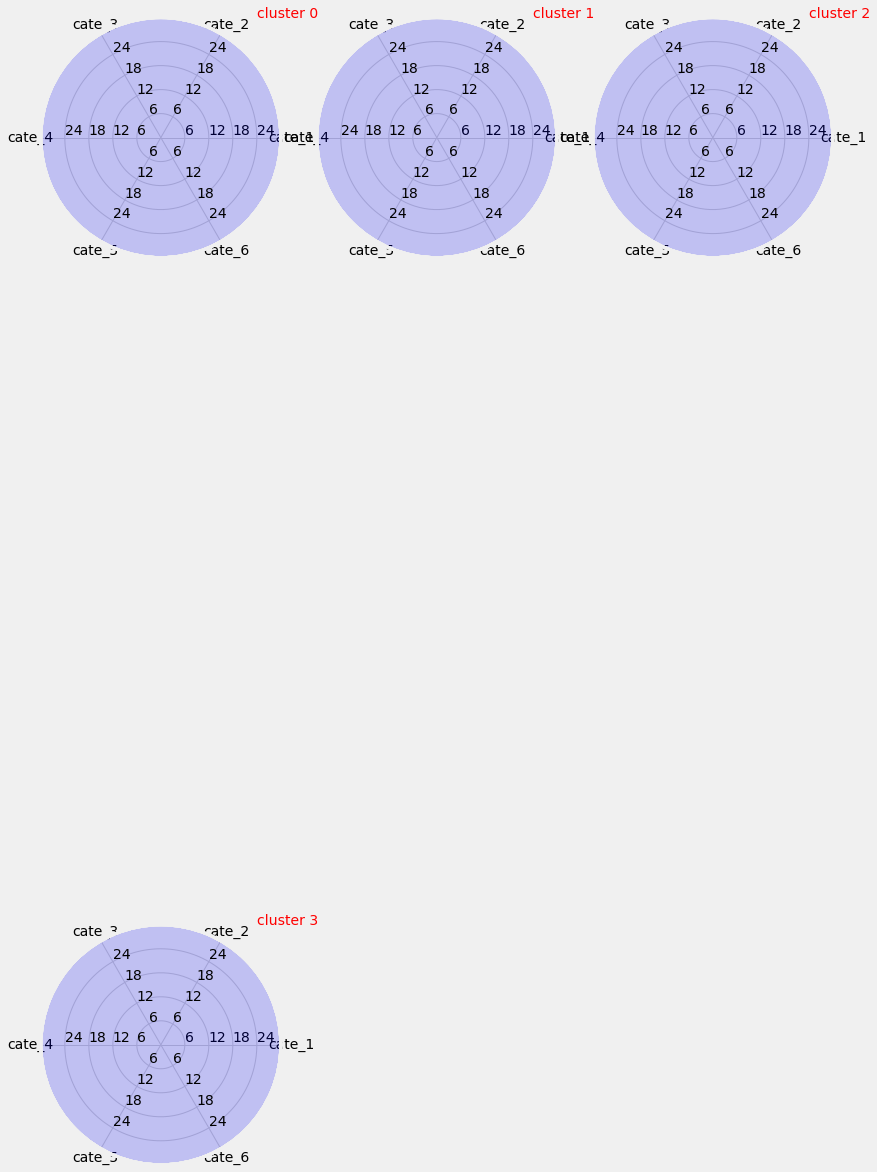

In [16]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

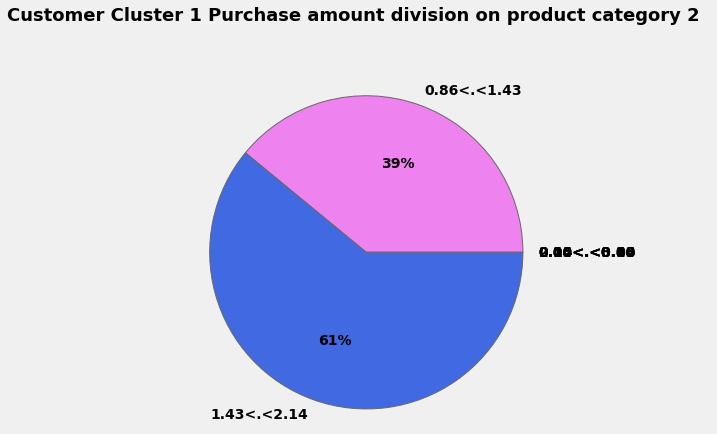

In [17]:
pie_chart(tf_idf_rfm, 1, 2)